In [2]:
import pennylane as qml
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def input_config(encoded_data):
    """The function accepts a string of digital values and 
    returns decoded array that corresponds to the input data"""

    # The above algorithm only works for 2 qubits

    print(f"Encoded data: {len(encoded_data)}")
    decoded_data = np.zeros((len(encoded_data), len(encoded_data)))
    print(decoded_data.shape)
    print(decoded_data)
    decoded_data[int(encoded_data[0]),int(encoded_data[1])] = 1
    print(decoded_data)
    new_decoded_data = decoded_data.flatten()
    return new_decoded_data


In [4]:
def decoder(encoded_data):

    """This function generalize the above input_config function for nxn qubits"""

    dim = np.full((len(encoded_data)), 2)
    # print(dim)
    decoded_data = np.zeros(dim)
    # print(decoded_data)
    decoded_data[tuple(int(i) for i in encoded_data)] = 1
    # print(decoded_data)
    new_decoded_data = decoded_data.flatten()
    return new_decoded_data

In [5]:
device = qml.device("default.qubit", wires = range(3))
initial_states = np.array(decoder("011"))

@qml.qnode(device)
def ansatz():
    qml.StatePrep(initial_states, wires = range(3))
    negation = qml.PauliX(wires = 0)
    qml.ctrl(negation, control=(1,2), control_values = [1,1])
    return qml.expval(qml.PauliY(0))


0.0


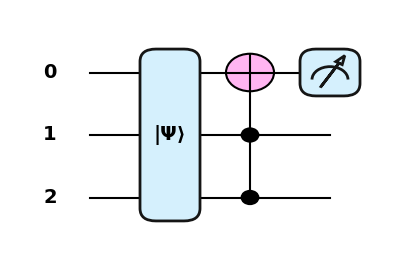

In [6]:
print(ansatz())

fig , ax = qml.draw_mpl(ansatz, style = 'pennylane')()
fig.set_size_inches(4,2.5)
plt.show()

In [7]:
# How to find the eigenvalues of a given operator
z = qml.PauliZ(wires = 0)
eig = qml.eigvals(z)
print(eig)

[ 1. -1.]


In [ ]:
new_device = qml.device("default.qubit", wires = 0)
initial_value = np.array(decoder("0"))
print(initial_value)

@qml.qnode(new_device)
def rotation_circuit(params):
    qml.StatePrep(initial_value, wires = 0)
    qml.RZ(params[2], wires = 0)
    return qml.expval(qml.PauliZ(0))


[1. 0.]


1.0


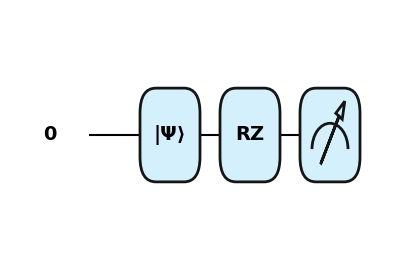

In [37]:
print(rotation_circuit([np.pi, np.pi, np.pi]))
fig , ax = qml.draw_mpl(rotation_circuit, style = 'pennylane')([np.pi,np.pi,np.pi])
fig.set_size_inches(4,2.5)
plt.show()